In [1]:
import zipfile

In [2]:
zip_file_path = '/content/drive/My Drive/archive (2).zip'
extract_path =  '/content/drive/My Drive/ExtractedFolder/'

In [3]:
#to mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#to get all the file paths in My drive , it's easier to generate the file paths
import os
folder_path = '/content/drive/MyDrive/'
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/02153.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/03405.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/03637.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/07125.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/07722.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/04219.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/07884.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/05399.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/Mercedes-Benz Sprinter Van 2012/03910.txt
/content/drive/MyDrive/archive (2)/car_data/labels/train/M

In [5]:
import pandas as pd
import cv2
import glob

In [6]:
#assigning file and folder paths for test and train sets of annotations,images and labels
testdir = '/content/drive/MyDrive/archive (2)/car_data/car_data/test'
traindir = '/content/drive/MyDrive/archive (2)/car_data/car_data/train'
testannot = '/content/drive/MyDrive/archive (2)/anno_train.csv'
trainannot = '/content/drive/MyDrive/archive (2)/anno_train.csv'
carnames = '/content/drive/MyDrive/archive (2)/names.csv'
trainlabelsdir = '/content/drive/MyDrive/archive (2)/car_data/labels/train'
testlabelsdir = '/content/drive/MyDrive/archive (2)/car_data/labels/test'

In [7]:
df = pd.read_csv(trainannot, header=None)#whether the first row is empty
#naming the unnamed columns using rename function
df.rename(columns={0:'Image_Name',1:'Image_class',2:'xmin',3:'ymin',4:'xmax',5:'ymax'}, inplace=True)
df.head()


Image_Name  Image_class  xmin  ymin  xmax  ymax
0  00001.jpg           39   116   569   375    14
1  00002.jpg           36   116   868   587     3
2  00003.jpg           85   109   601   381    91
3  00004.jpg          621   393  1484  1096   134
4  00005.jpg           14    36   133    99   106

In [8]:
traindataset=traindir+'*/*' #collects the subfolders under the folder of path traindir
trainList=glob.glob(traindataset) # returns a list of all the filepaths in traindataset
trainListPaths=[]
for fileandFolder in trainList:
  List1 = fileandFolder.split('/')[-2:] #selecting only the last 2 folders of the file path
  trainListPaths.append(List1)
print(len(trainListPaths))

196


In [9]:
import os
import glob
trainListPaths = []
for folder in glob.glob(os.path.join(traindir, '*')):
    carName = os.path.basename(folder)

    image_files = glob.glob(os.path.join(folder, '*'))

    for image_path in image_files:
        imageName = os.path.basename(image_path)
        trainListPaths.append([carName, imageName])


In [10]:
dfTrain = pd.DataFrame(trainListPaths, columns = ['carName','imageName'])
train_df = dfTrain.merge(df, how='inner', left_on='imageName', right_on='Image_Name')

In [11]:
train_df.head()

carName  imageName Image_Name  Image_class  xmin  \
0          Volvo C30 Hatchback 2012  03224.jpg  03224.jpg           65   478   
1    Volkswagen Golf Hatchback 1991  07540.jpg  07540.jpg          417   497   
2    Volkswagen Golf Hatchback 1991  04078.jpg  04078.jpg          456   773   
3  Volkswagen Beetle Hatchback 2012  03748.jpg  03748.jpg          105   270   
4  Volkswagen Beetle Hatchback 2012  07958.jpg  07958.jpg           44    36   

   ymin  xmax  ymax  
0  1514   989   193  
1  2981  2088   191  
2  2795  1988   191  
3  1292   996   192  
4  2313  1495   192

In [12]:
df_train = train_df.copy()
unique_cars_sorted = df_train[['Image_class', 'carName']].drop_duplicates().sort_values(by='Image_class')

unique_cars_sorted.reset_index(drop=True, inplace=True)
unique_cars_sorted['carName'].unique()

array(['Jeep Compass SUV 2012', 'Nissan Leaf Hatchback 2012',
       'Audi RS 4 Convertible 2008', 'Dodge Charger Sedan 2012',
       'BMW 3 Series Wagon 2012', 'Chevrolet Traverse SUV 2012',
       'Plymouth Neon Coupe 1999', 'Ford Edge SUV 2012',
       'Nissan Juke Hatchback 2012', 'Audi 100 Wagon 1994',
       'Jeep Patriot SUV 2012', 'Mitsubishi Lancer Sedan 2012',
       'Volkswagen Beetle Hatchback 2012', 'Chevrolet Impala Sedan 2007',
       'Ford F-150 Regular Cab 2012', 'Volvo C30 Hatchback 2012',
       'Dodge Durango SUV 2012', 'Eagle Talon Hatchback 1998',
       'Nissan 240SX Coupe 1998', 'Dodge Charger SRT-8 2009',
       'Chevrolet Sonic Sedan 2012', 'McLaren MP4-12C Coupe 2012',
       'AM General Hummer SUV 2000', 'Suzuki Kizashi Sedan 2012',
       'BMW 1 Series Coupe 2012', 'Suzuki SX4 Hatchback 2012',
       'Bentley Continental Flying Spur Sedan 2007',
       'Spyker C8 Convertible 2009', 'Audi TTS Coupe 2012',
       'Hyundai Azera Sedan 2012',
       'Chevrolet 

In [13]:
annotationsTestDF = pd.read_csv(testannot, header=None)
annotationsTestDF.rename(columns={
    0: 'Image_Name',
    1: 'Image_class',
    2: 'xmin',
    3: 'ymin',
    4: 'xmax',
    5: 'ymax'
}, inplace=True)
annotationsTestDF.head()


Image_Name  Image_class  xmin  ymin  xmax  ymax
0  00001.jpg           39   116   569   375    14
1  00002.jpg           36   116   868   587     3
2  00003.jpg           85   109   601   381    91
3  00004.jpg          621   393  1484  1096   134
4  00005.jpg           14    36   133    99   106

In [14]:
testdataset = testdir + '*/*'
testList = glob.glob(testdataset)
testListPaths = []
for fileandFolder in testList:
  lList = fileandFolder.split('/')[-2:]
  testListPaths.append(lList)
print(len(testListPaths))

196


In [15]:
print(testListPaths[:5])


[['test', 'Volvo C30 Hatchback 2012'], ['test', 'Volvo XC90 SUV 2007'], ['test', 'Toyota Camry Sedan 2012'], ['test', 'Volkswagen Golf Hatchback 2012'], ['test', 'Toyota Corolla Sedan 2012']]


In [16]:
import os

testListPaths = []
for folder in glob.glob(os.path.join(testdir, '*')):
    carName = os.path.basename(folder)
    image_files = glob.glob(os.path.join(folder, '*'))

    for image_path in image_files:
        imageName = os.path.basename(image_path)
        testListPaths.append([carName, imageName])


In [17]:
dfTest = pd.DataFrame(testListPaths, columns = ['carName','imageName'])

test_df = dfTest.merge(annotationsTestDF, how='inner', left_on='imageName', right_on='Image_Name')

In [18]:
df_test = test_df.copy()
unique_cars_sorted_test = df_test[['Image_class', 'carName']].drop_duplicates().sort_values(by='Image_class')

unique_cars_sorted_test.reset_index(drop=True, inplace=True)
unique_cars_sorted_test['carName'].unique()

array(['Chevrolet Impala Sedan 2007', 'Chevrolet Traverse SUV 2012',
       'BMW 3 Series Wagon 2012', 'Dodge Journey SUV 2012',
       'Suzuki SX4 Sedan 2012', 'Dodge Magnum Wagon 2008',
       'BMW 6 Series Convertible 2007', 'Buick Verano Sedan 2012',
       'Suzuki Kizashi Sedan 2012', 'Chevrolet Cobalt SS 2010',
       'Acura RL Sedan 2012', 'Audi R8 Coupe 2012',
       'Volvo 240 Sedan 1993', 'Aston Martin V8 Vantage Convertible 2012',
       'BMW M6 Convertible 2010', 'Jeep Compass SUV 2012',
       'Eagle Talon Hatchback 1998', 'Acura TL Type-S 2008',
       'Jeep Liberty SUV 2012', 'Dodge Challenger SRT8 2011',
       'Ford F-150 Regular Cab 2007', 'Hyundai Veloster Hatchback 2012',
       'Spyker C8 Convertible 2009',
       'Bentley Continental Supersports Conv. Convertible 2012',
       'Suzuki SX4 Hatchback 2012', 'Nissan Juke Hatchback 2012',
       'Mercedes-Benz S-Class Sedan 2012', 'Dodge Durango SUV 2012',
       'Ford Freestar Minivan 2007', 'Jeep Wrangler SUV 2012',

In [19]:
#os.makedirs(trainlabelsdir, exist_ok=True)
def convert_to_yolo(img_width, img_height, x1, y1, x2, y2):
    x_center = ((x1 + x2) / 2) / img_width
    y_center = ((y1 + y2) / 2) / img_height
    width = (x2 - x1) / img_width
    height = (y2 - y1) / img_height
    return x_center, y_center, width, height

In [20]:
# Process each row in the CSV
for _, row in train_df.iterrows():
    image_name = row['imageName']
    class_id = int(row['Image_class']) - 1  # Convert class to 0-indexed
    x1 = row['xmin']
    y1 = row['ymin']
    x2 = row['xmax']
    y2 = row['ymax']
    # Load the image to get dimensions
    folder = os.path.join(traindir,row['carName'])
    imgfile = os.path.join(folder,row['Image_Name'])
    image_path = imgfile
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image {image_name} not found. Skipping.")
        continue
    img_height, img_width = image.shape[:2]

    # Convert to YOLO format
    x_center, y_center, width, height = convert_to_yolo(
        img_width, img_height, float(x1), float(y1), float(x2), float(y2)
    )

    # Write to a .txt file
    labelfolder = os.path.join(trainlabelsdir, row['carName'])
    #print(labelfolder)
    os.makedirs(labelfolder, exist_ok=True)
    label_file = os.path.join(labelfolder, image_name.replace('.jpg', '.txt'))
    with open(label_file, "w") as f:
        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print("Conversion to YOLO format completed.")



Conversion to YOLO format completed.


In [21]:
def copy_file(src_path, dest_path,dataframe,):
  df_internal = dataframe.copy()
  for _, row in df_internal.iterrows():
      image_name = row['imageName']
      car_name = row['carName']
      src_file = os.path.join(src_path, car_name, image_name)
      print(src_file)
      dest_file = os.path.join(dest_path, image_name)
      shutil.copy(src_file, dest_file)

In [22]:
import os
import shutil
copy_path = r'/content/drive/MyDrive/archive (2)/car_data/car_data'
os.makedirs(copy_path, exist_ok=True)
train_dir=os.path.join(copy_path,'train')
test_dir=os.path.join(copy_path,'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

copy_file(traindir,train_dir,train_df)
copy_file(testdir,test_dir,test_df)


/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volvo C30 Hatchback 2012/03224.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volkswagen Golf Hatchback 1991/07540.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volkswagen Golf Hatchback 1991/04078.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volkswagen Beetle Hatchback 2012/03748.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volkswagen Beetle Hatchback 2012/07958.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Volkswagen Beetle Hatchback 2012/07551.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Spyker C8 Convertible 2009/03076.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Suzuki SX4 Hatchback 2012/04364.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Suzuki SX4 Hatchback 2012/03487.jpg
/content/drive/MyDrive/archive (2)/car_data/car_data/train/Suzuki SX4 Hatchback 2012/00230.jpg
/content/drive/MyDr

In [23]:
def copy_labels(src_path, dest_path,dataframe):
  df_internal = dataframe.copy()
  for _, row in df_internal.iterrows():
    image_name = row['imageName']
    car_name = row['carName']

    src_file = os.path.join(src_path, car_name, image_name.replace('.jpg', '.txt'))
    dest_file = os.path.join(dest_path, image_name.replace('.jpg', '.txt'))
    shutil.copy(src_file, dest_file)

In [24]:
import os
import cv2

def convert_to_yolo(img_w, img_h, x_min, y_min, x_max, y_max):
    x_center = (x_min + x_max) / 2 / img_w
    y_center = (y_min + y_max) / 2 / img_h
    width = (x_max - x_min) / img_w
    height = (y_max - y_min) / img_h
    return x_center, y_center, width, height

def process_labels(df, base_image_dir, base_label_dir):
    # df: dataframe containing columns like ['carName', 'imageName', 'xmin', 'ymin', 'xmax', 'ymax', 'Image_class']

    for idx, row in df.iterrows():
        class_name = row['carName']          # folder/class name
        image_name = row['imageName']        # image file name
        class_id = int(row['Image_class']) - 1  # zero-index class id

        img_path = os.path.join(base_image_dir, class_name, image_name)
        label_dir = os.path.join(base_label_dir, class_name)
        os.makedirs(label_dir, exist_ok=True)

        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found: {img_path}, skipping")
            continue
        h, w = img.shape[:2]

        x_c, y_c, bw, bh = convert_to_yolo(w, h, row['xmin'], row['ymin'], row['xmax'], row['ymax'])

        label_file = os.path.join(label_dir, image_name.replace('.jpg', '.txt'))
        with open(label_file, 'w') as f:
            f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}\n")

    print(f"Labels converted and saved in {base_label_dir}")

# Example usage:

train_image_dir = r'/content/drive/MyDrive/archive (2)/car_data/car_data/train'
train_label_dir = r'/content/drive/MyDrive/archive (2)/car_data/labels/train'
test_image_dir = r'/content/drive/MyDrive/archive (2)/car_data/car_data/test'
test_label_dir = r'/content/drive/MyDrive/archive (2)/car_data/labels/test'

# assuming you have train_df and test_df with the columns as above:
process_labels(train_df, train_image_dir, train_label_dir)
process_labels(test_df, test_image_dir, test_label_dir)


Labels converted and saved in /content/drive/MyDrive/archive (2)/car_data/labels/train
Labels converted and saved in /content/drive/MyDrive/archive (2)/car_data/labels/test


In [25]:
import os
import shutil
copy_path_labels = r'/content/drive/MyDrive/archive (2)/car_data/labels'
os.makedirs(copy_path_labels, exist_ok=True)
train_dir_label=os.path.join(copy_path_labels,'train')
test_dir_label=os.path.join(copy_path_labels,'test')
os.makedirs(train_dir_label, exist_ok=True)
os.makedirs(test_dir_label, exist_ok=True)

copy_labels(trainlabelsdir,train_dir_label,train_df)
copy_labels(testlabelsdir,test_dir_label,test_df)

In [26]:
!pip install ultralytics opencv-python-headless pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [30]:
import os
print(os.path.exists("/content/drive/MyDrive/archive (2)/car_data/car_data/train"))
print(os.path.exists("/content/drive/MyDrive/archive (2)/car_data/car_data/test"))


True
True


In [35]:
import os

img_dir = "/content/drive/MyDrive/archive (2)/car_data/car_data/test"
label_dir = "/content/drive/MyDrive/archive (2)/car_data/labels/test"

img_files = sorted([f[:-4] for f in os.listdir(img_dir) if f.endswith('.jpg')])
label_files = sorted([f[:-4] for f in os.listdir(label_dir) if f.endswith('.txt')])

missing_labels = set(img_files) - set(label_files)
print(f"Total images: {len(img_files)}")
print(f"Total labels: {len(label_files)}")
print(f"Missing labels for: {len(missing_labels)} images")


Total images: 80
Total labels: 80
Missing labels for: 0 images


In [ ]:
for f in missing_labels:
    open(os.path.join(label_dir, f + '.txt'), 'w').close()


In [34]:
from ultralytics import YOLO
#from pathlib import Path
# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")
rel_path = r"/content/drive/MyDrive/archive (2)/car_data/data.yaml"
#full_path = Path(rel_path).resolve()
# Train the model
results = model.train(
    data=rel_path,
    epochs=50,
    imgsz=640,
    batch=16)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/archive (2)/car_data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]

Overriding model.yaml nc=80 with nc=196

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

Model summary: 129 layers, 3,375,228 parameters, 3,375,212 gradients, 9.9 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 109.4±42.8 MB/s, size: 2514.3 KB)


train: Scanning /content/drive/MyDrive/archive (2)/car_data/car_data/train... 0 images, 170 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:01<00:00, 109.88it/s]

WARNING ⚠️ train: No labels found in /content/drive/MyDrive/archive (2)/car_data/car_data/train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /content/drive/MyDrive/archive (2)/car_data/car_data/train.cache
WARNING ⚠️ Labels are missing or empty in /content/drive/MyDrive/archive (2)/car_data/car_data/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 167.4±56.4 MB/s, size: 5151.2 KB)


val: Scanning /content/drive/MyDrive/archive (2)/car_data/car_data/test... 0 images, 160 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:01<00:00, 114.25it/s]

WARNING ⚠️ val: No labels found in /content/drive/MyDrive/archive (2)/car_data/car_data/test.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/drive/MyDrive/archive (2)/car_data/car_data/test.cache
WARNING ⚠️ Labels are missing or empty in /content/drive/MyDrive/archive (2)/car_data/car_data/test.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train4/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=5e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G          0      122.8          0          0        640: 100%|██████████| 11/11 [02:33<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:47<00:00,  9.53s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G          0      122.4          0          0        640: 100%|██████████| 11/11 [02:18<00:00, 12.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.13s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
       3/50         0G          0        122          0          0        640: 100%|██████████| 11/11 [02:09<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:45<00:00,  9.09s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G          0      121.4          0          0        640: 100%|██████████| 11/11 [02:08<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.50s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G          0      120.7          0          0        640: 100%|██████████| 11/11 [02:15<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.76s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
       6/50         0G          0      120.1          0          0        640: 100%|██████████| 11/11 [02:10<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.88s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G          0      119.3          0          0        640: 100%|██████████| 11/11 [02:20<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.52s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G          0      118.5          0          0        640: 100%|██████████| 11/11 [02:13<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.86s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G          0      117.8          0          0        640: 100%|██████████| 11/11 [02:11<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.84s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G          0      117.1          0          0        640: 100%|██████████| 11/11 [02:15<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:48<00:00,  9.63s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G          0      116.5          0          0        640: 100%|██████████| 11/11 [02:17<00:00, 12.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.68s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G          0      115.9          0          0        640: 100%|██████████| 11/11 [02:04<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.27s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G          0      115.3          0          0        640: 100%|██████████| 11/11 [02:00<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.30s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      14/50         0G          0      114.8          0          0        640: 100%|██████████| 11/11 [02:09<00:00, 11.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.01s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G          0      114.4          0          0        640: 100%|██████████| 11/11 [02:04<00:00, 11.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.64s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G          0        114          0          0        640: 100%|██████████| 11/11 [02:05<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.36s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G          0      113.6          0          0        640: 100%|██████████| 11/11 [01:59<00:00, 10.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.52s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G          0      113.3          0          0        640: 100%|██████████| 11/11 [02:08<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.68s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G          0        113          0          0        640: 100%|██████████| 11/11 [02:01<00:00, 11.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.27s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G          0      112.7          0          0        640: 100%|██████████| 11/11 [02:01<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:35<00:00,  7.08s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      21/50         0G          0      112.4          0          0        640: 100%|██████████| 11/11 [02:02<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.73s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G          0      112.1          0          0        640: 100%|██████████| 11/11 [02:09<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.98s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G          0      111.9          0          0        640: 100%|██████████| 11/11 [02:02<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.58s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G          0      111.6          0          0        640: 100%|██████████| 11/11 [02:03<00:00, 11.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.50s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      25/50         0G          0      111.4          0          0        640: 100%|██████████| 11/11 [02:01<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.45s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      26/50         0G          0      111.2          0          0        640: 100%|██████████| 11/11 [01:58<00:00, 10.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.65s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G          0        111          0          0        640: 100%|██████████| 11/11 [01:57<00:00, 10.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:35<00:00,  7.11s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      28/50         0G          0      110.8          0          0        640: 100%|██████████| 11/11 [02:00<00:00, 10.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.45s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G          0      110.7          0          0        640: 100%|██████████| 11/11 [02:03<00:00, 11.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.27s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G          0      110.5          0          0        640: 100%|██████████| 11/11 [02:12<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.53s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G          0      110.3          0          0        640: 100%|██████████| 11/11 [02:06<00:00, 11.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.65s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G          0      110.2          0          0        640: 100%|██████████| 11/11 [02:01<00:00, 11.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:37<00:00,  7.56s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G          0        110          0          0        640: 100%|██████████| 11/11 [02:11<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:39<00:00,  7.89s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G          0      109.9          0          0        640: 100%|██████████| 11/11 [02:09<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.04s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G          0      109.8          0          0        640: 100%|██████████| 11/11 [02:01<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.05s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G          0      109.7          0          0        640: 100%|██████████| 11/11 [02:08<00:00, 11.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.34s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G          0      109.5          0          0        640: 100%|██████████| 11/11 [02:20<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:44<00:00,  8.87s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G          0      109.4          0          0        640: 100%|██████████| 11/11 [02:23<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:44<00:00,  8.90s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G          0      109.3          0          0        640: 100%|██████████| 11/11 [02:20<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.52s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G          0      109.3          0          0        640: 100%|██████████| 11/11 [02:18<00:00, 12.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.79s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G          0      109.3          0          0        640: 100%|██████████| 11/11 [02:17<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:44<00:00,  8.85s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      42/50         0G          0      109.1          0          0        640: 100%|██████████| 11/11 [02:19<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.54s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G          0        109          0          0        640: 100%|██████████| 11/11 [02:19<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:45<00:00,  9.04s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G          0        109          0          0        640: 100%|██████████| 11/11 [02:20<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.26s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      45/50         0G          0      108.9          0          0        640: 100%|██████████| 11/11 [02:13<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.57s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G          0      108.9          0          0        640: 100%|██████████| 11/11 [02:13<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.46s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
      47/50         0G          0      108.9          0          0        640: 100%|██████████| 11/11 [02:16<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.43s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G          0      108.8          0          0        640: 100%|██████████| 11/11 [02:11<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.04s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G          0      108.8          0          0        640: 100%|██████████| 11/11 [02:09<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.67s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G          0      108.8          0          0        640: 100%|██████████| 11/11 [02:17<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:45<00:00,  9.09s/it]

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



50 epochs completed in 2.379 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 7.0MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 7.0MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:36<00:00,  7.37s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:668: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_met

                   all        160          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 2.3ms preprocess, 176.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train4



image 1/1 /content/drive/My Drive/archive (2)/car_data/car_data/test/Toyota Camry Sedan 2012/06540.jpg: 448x640 (no detections), 217.2ms
Speed: 4.5ms preprocess, 217.2ms inference, 4.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4


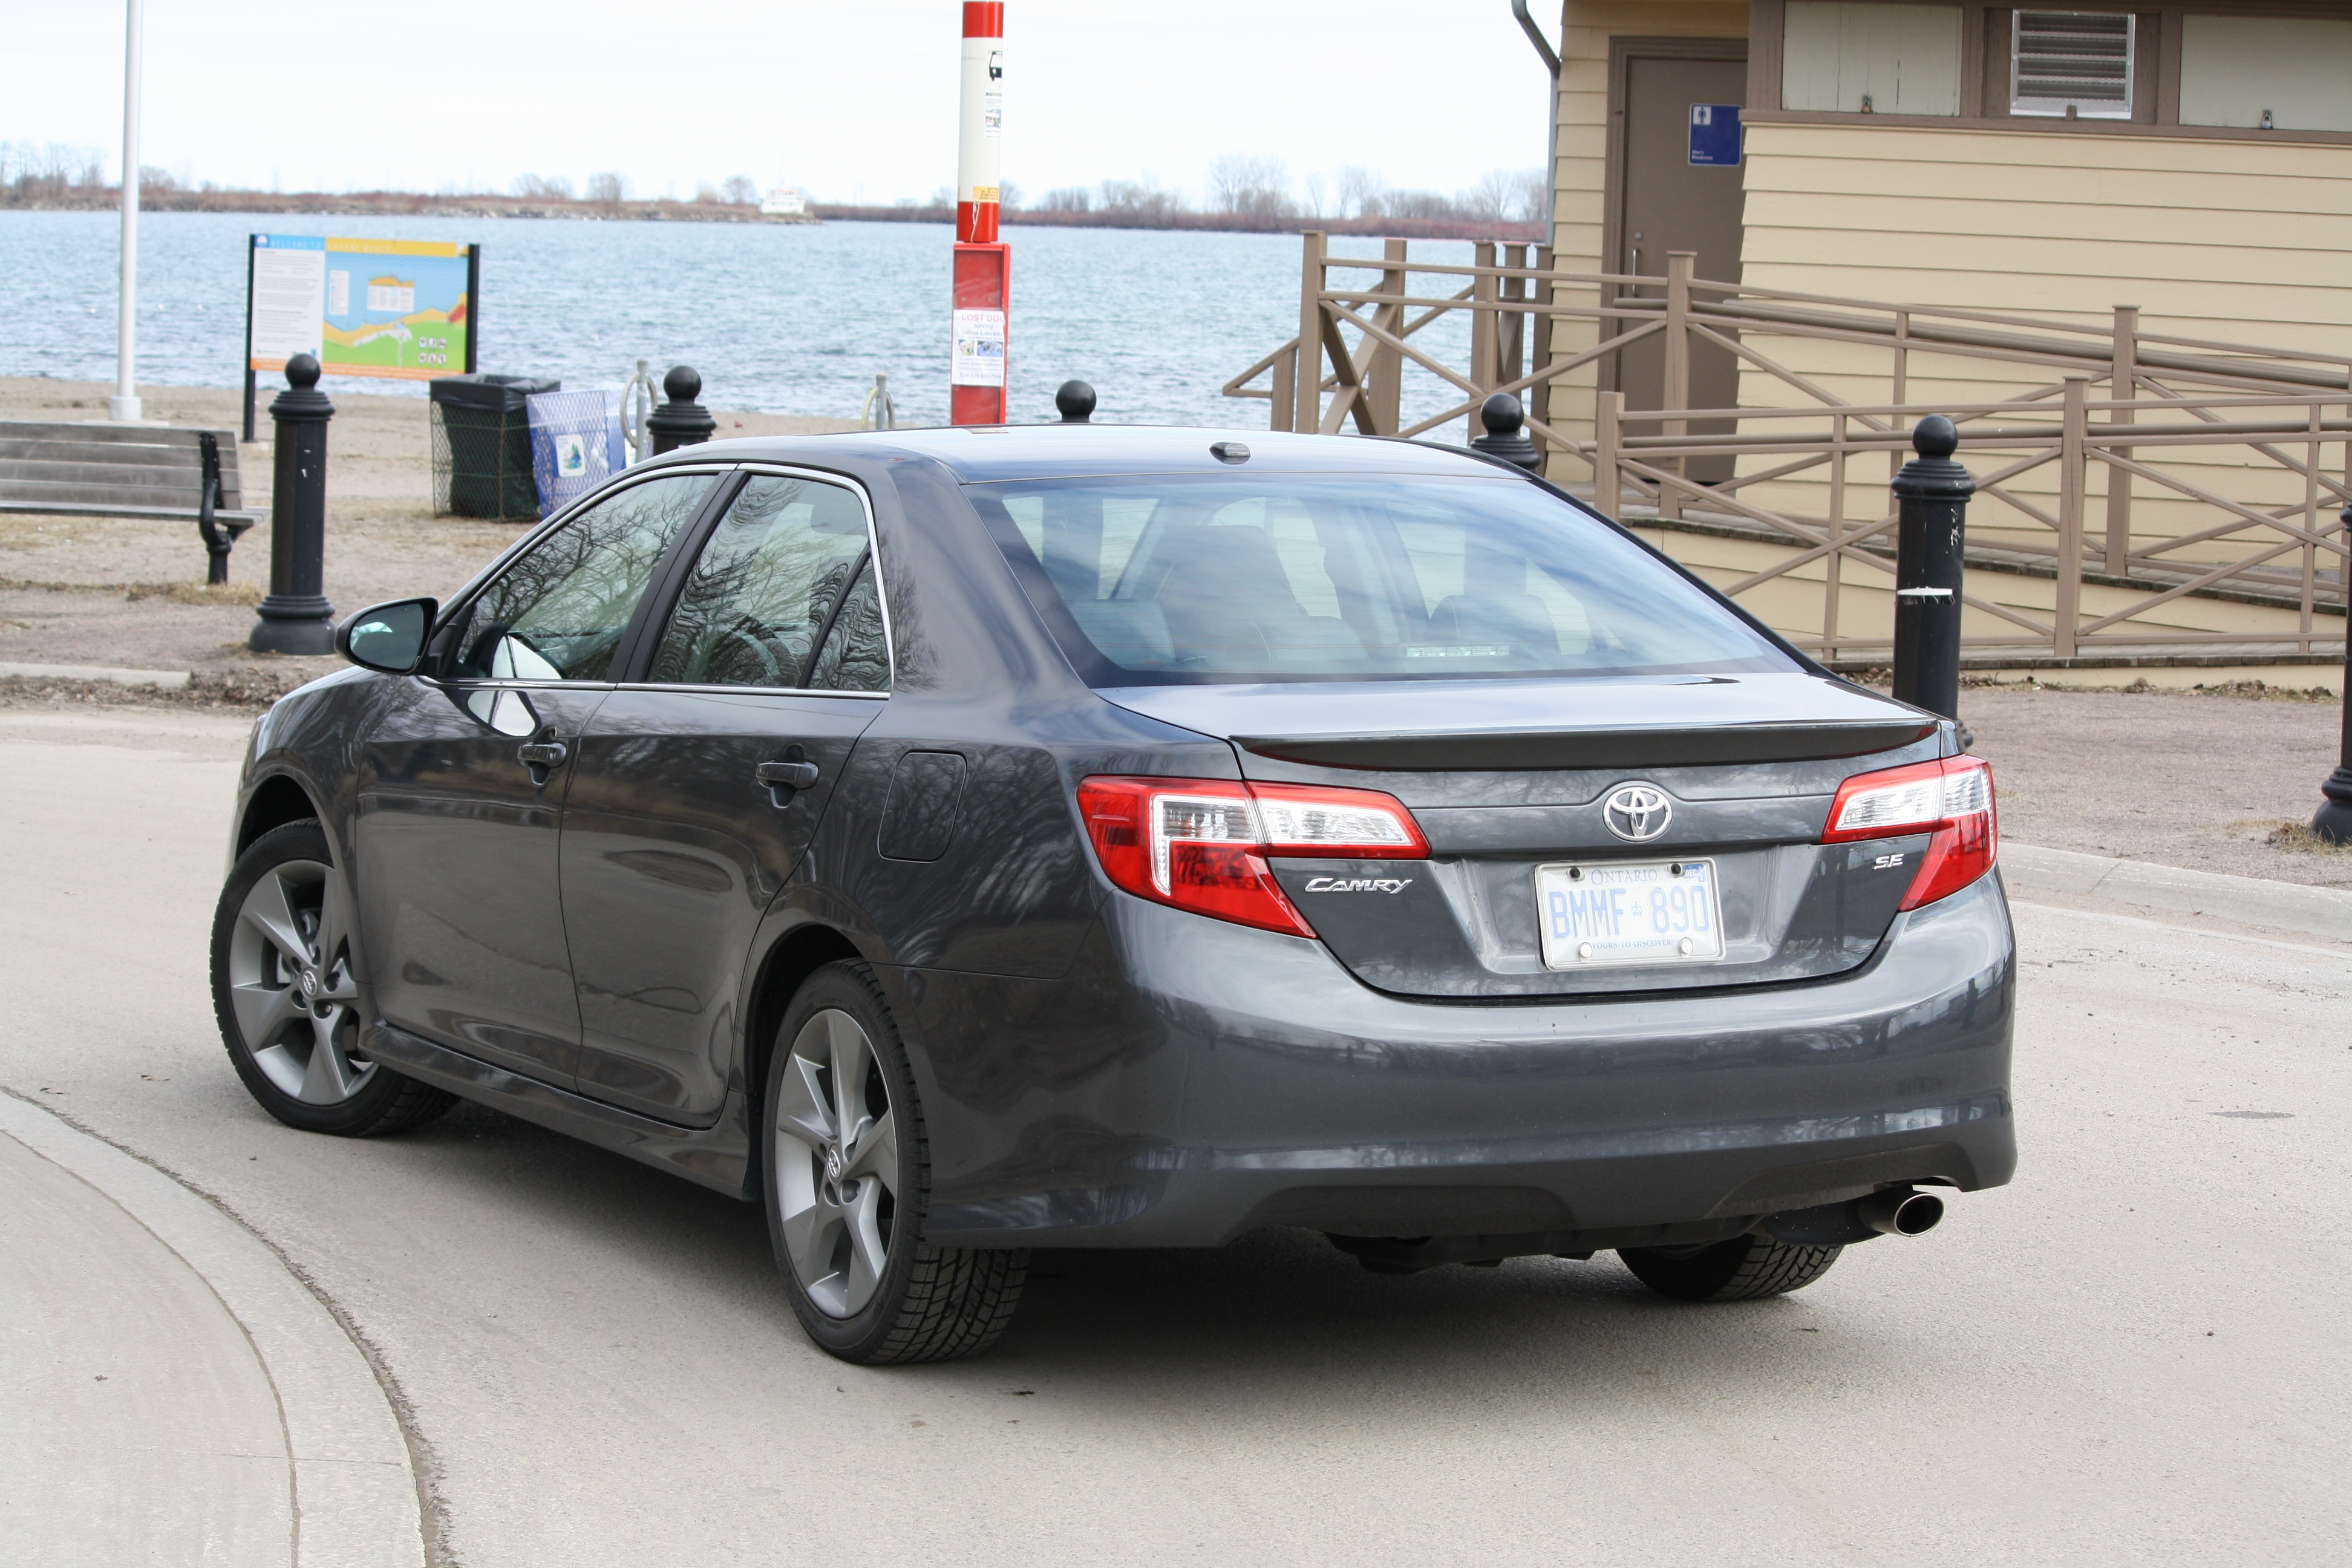

In [50]:
import glob
from IPython.display import Image, display
# Load the trained model
class_names = ['AM General Hummer SUV 2000','Acura RL Sedan 2012','Acura TL Sedan 2012','Acura TL Type-S 2008','Acura TSX Sedan 2012','Acura Integra Type R 2001',
        'Acura ZDX Hatchback 2012','Aston Martin V8 Vantage Convertible 2012','Aston Martin V8 Vantage Coupe 2012','Aston Martin Virage Convertible 2012',
        'Aston Martin Virage Coupe 2012','Audi RS 4 Convertible 2008','Audi A5 Coupe 2012','Audi TTS Coupe 2012','Audi R8 Coupe 2012','Audi V8 Sedan 1994',
        'Audi 100 Sedan 1994','Audi 100 Wagon 1994','Audi TT Hatchback 2011','Audi S6 Sedan 2011','Audi S5 Convertible 2012','Audi S5 Coupe 2012',
        'Audi S4 Sedan 2012','Audi S4 Sedan 2007','Audi TT RS Coupe 2012','BMW ActiveHybrid 5 Sedan 2012','BMW 1 Series Convertible 2012',
        'BMW 1 Series Coupe 2012','BMW 3 Series Sedan 2012','BMW 3 Series Wagon 2012','BMW 6 Series Convertible 2007','BMW X5 SUV 2007','BMW X6 SUV 2012',
        'BMW M3 Coupe 2012','BMW M5 Sedan 2010','BMW M6 Convertible 2010','BMW X3 SUV 2012','BMW Z4 Convertible 2012',
        'Bentley Continental Supersports Conv. Convertible 2012','Bentley Arnage Sedan 2009','Bentley Mulsanne Sedan 2011','Bentley Continental GT Coupe 2012',
        'Bentley Continental GT Coupe 2007','Bentley Continental Flying Spur Sedan 2007','Bugatti Veyron 16.4 Convertible 2009','Bugatti Veyron 16.4 Coupe 2009',
        'Buick Regal GS 2012','Buick Rainier SUV 2007','Buick Verano Sedan 2012','Buick Enclave SUV 2012','Cadillac CTS-V Sedan 2012','Cadillac SRX SUV 2012',
        'Cadillac Escalade EXT Crew Cab 2007','Chevrolet Silverado 1500 Hybrid Crew Cab 2012','Chevrolet Corvette Convertible 2012','Chevrolet Corvette ZR1 2012',
        'Chevrolet Corvette Ron Fellows Edition Z06 2007','Chevrolet Traverse SUV 2012','Chevrolet Camaro Convertible 2012','Chevrolet HHR SS 2010',
        'Chevrolet Impala Sedan 2007','Chevrolet Tahoe Hybrid SUV 2012','Chevrolet Sonic Sedan 2012','Chevrolet Express Cargo Van 2007',
        'Chevrolet Avalanche Crew Cab 2012','Chevrolet Cobalt SS 2010','Chevrolet Malibu Hybrid Sedan 2010','Chevrolet TrailBlazer SS 2009',
        'Chevrolet Silverado 2500HD Regular Cab 2012','Chevrolet Silverado 1500 Classic Extended Cab 2007','Chevrolet Express Van 2007',
        'Chevrolet Monte Carlo Coupe 2007','Chevrolet Malibu Sedan 2007','Chevrolet Silverado 1500 Extended Cab 2012','Chevrolet Silverado 1500 Regular Cab 2012',
        'Chrysler Aspen SUV 2009','Chrysler Sebring Convertible 2010','Chrysler Town and Country Minivan 2012','Chrysler 300 SRT-8 2010',
        'Chrysler Crossfire Convertible 2008','Chrysler PT Cruiser Convertible 2008','Daewoo Nubira Wagon 2002','Dodge Caliber Wagon 2012',
        'Dodge Caliber Wagon 2007','Dodge Caravan Minivan 1997','Dodge Ram Pickup 3500 Crew Cab 2010','Dodge Ram Pickup 3500 Quad Cab 2009',
        'Dodge Sprinter Cargo Van 2009','Dodge Journey SUV 2012','Dodge Dakota Crew Cab 2010','Dodge Dakota Club Cab 2007','Dodge Magnum Wagon 2008',
        'Dodge Challenger SRT8 2011','Dodge Durango SUV 2012','Dodge Durango SUV 2007','Dodge Charger Sedan 2012','Dodge Charger SRT-8 2009',
        'Eagle Talon Hatchback 1998','FIAT 500 Abarth 2012','FIAT 500 Convertible 2012','Ferrari FF Coupe 2012','Ferrari California Convertible 2012',
        'Ferrari 458 Italia Convertible 2012','Ferrari 458 Italia Coupe 2012','Fisker Karma Sedan 2012','Ford F-450 Super Duty Crew Cab 2012',
        'Ford Mustang Convertible 2007','Ford Freestar Minivan 2007','Ford Expedition EL SUV 2009','Ford Edge SUV 2012','Ford Ranger SuperCab 2011',
        'Ford GT Coupe 2006','Ford F-150 Regular Cab 2012','Ford F-150 Regular Cab 2007','Ford Focus Sedan 2007','Ford E-Series Wagon Van 2012',
        'Ford Fiesta Sedan 2012','GMC Terrain SUV 2012','GMC Savana Van 2012','GMC Yukon Hybrid SUV 2012','GMC Acadia SUV 2012','GMC Canyon Extended Cab 2012',
        'Geo Metro Convertible 1993','HUMMER H3T Crew Cab 2010','HUMMER H2 SUT Crew Cab 2009','Honda Odyssey Minivan 2012','Honda Odyssey Minivan 2007',
        'Honda Accord Coupe 2012','Honda Accord Sedan 2012','Hyundai Veloster Hatchback 2012','Hyundai Santa Fe SUV 2012','Hyundai Tucson SUV 2012',
        'Hyundai Veracruz SUV 2012','Hyundai Sonata Hybrid Sedan 2012','Hyundai Elantra Sedan 2007','Hyundai Accent Sedan 2012','Hyundai Genesis Sedan 2012',
        'Hyundai Sonata Sedan 2012','Hyundai Elantra Touring Hatchback 2012','Hyundai Azera Sedan 2012','Infiniti G Coupe IPL 2012','Infiniti QX56 SUV 2011',
        'Isuzu Ascender SUV 2008','Jaguar XK XKR 2012','Jeep Patriot SUV 2012','Jeep Wrangler SUV 2012','Jeep Liberty SUV 2012','Jeep Grand Cherokee SUV 2012',
        'Jeep Compass SUV 2012','Lamborghini Reventon Coupe 2008','Lamborghini Aventador Coupe 2012','Lamborghini Gallardo LP 570-4 Superleggera 2012',
        'Lamborghini Diablo Coupe 2001','Land Rover Range Rover SUV 2012','Land Rover LR2 SUV 2012','Lincoln Town Car Sedan 2011',
        'MINI Cooper Roadster Convertible 2012','Maybach Landaulet Convertible 2012','Mazda Tribute SUV 2011','McLaren MP4-12C Coupe 2012',
        'Mercedes-Benz 300-Class Convertible 1993','Mercedes-Benz C-Class Sedan 2012','Mercedes-Benz SL-Class Coupe 2009','Mercedes-Benz E-Class Sedan 2012',
        'Mercedes-Benz S-Class Sedan 2012','Mercedes-Benz Sprinter Van 2012','Mitsubishi Lancer Sedan 2012','Nissan Leaf Hatchback 2012',
        'Nissan NV Passenger Van 2012','Nissan Juke Hatchback 2012','Nissan 240SX Coupe 1998','Plymouth Neon Coupe 1999','Porsche Panamera Sedan 2012',
        'Ram C-V Cargo Van Minivan 2012','Rolls-Royce Phantom Drophead Coupe Convertible 2012','Rolls-Royce Ghost Sedan 2012','Rolls-Royce Phantom Sedan 2012',
        'Scion xD Hatchback 2012','Spyker C8 Convertible 2009','Spyker C8 Coupe 2009','Suzuki Aerio Sedan 2007','Suzuki Kizashi Sedan 2012',
        'Suzuki SX4 Hatchback 2012','Suzuki SX4 Sedan 2012','Tesla Model S Sedan 2012','Toyota Sequoia SUV 2012','Toyota Camry Sedan 2012',
        'Toyota Corolla Sedan 2012','Toyota 4Runner SUV 2012','Volkswagen Golf Hatchback 2012','Volkswagen Golf Hatchback 1991','Volkswagen Beetle Hatchback 2012',
        'Volvo C30 Hatchback 2012','Volvo 240 Sedan 1993','Volvo XC90 SUV 2007','smart fortwo Convertible 2012']

model = YOLO("/content/runs/detect/train4/weights/best.pt")
image_path = "/content/drive/My Drive/archive (2)/car_data/car_data/test/Toyota Camry Sedan 2012/06540.jpg"
# Run inference on an image
results = model.predict(image_path, save=True)
detections = results[0].boxes



# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

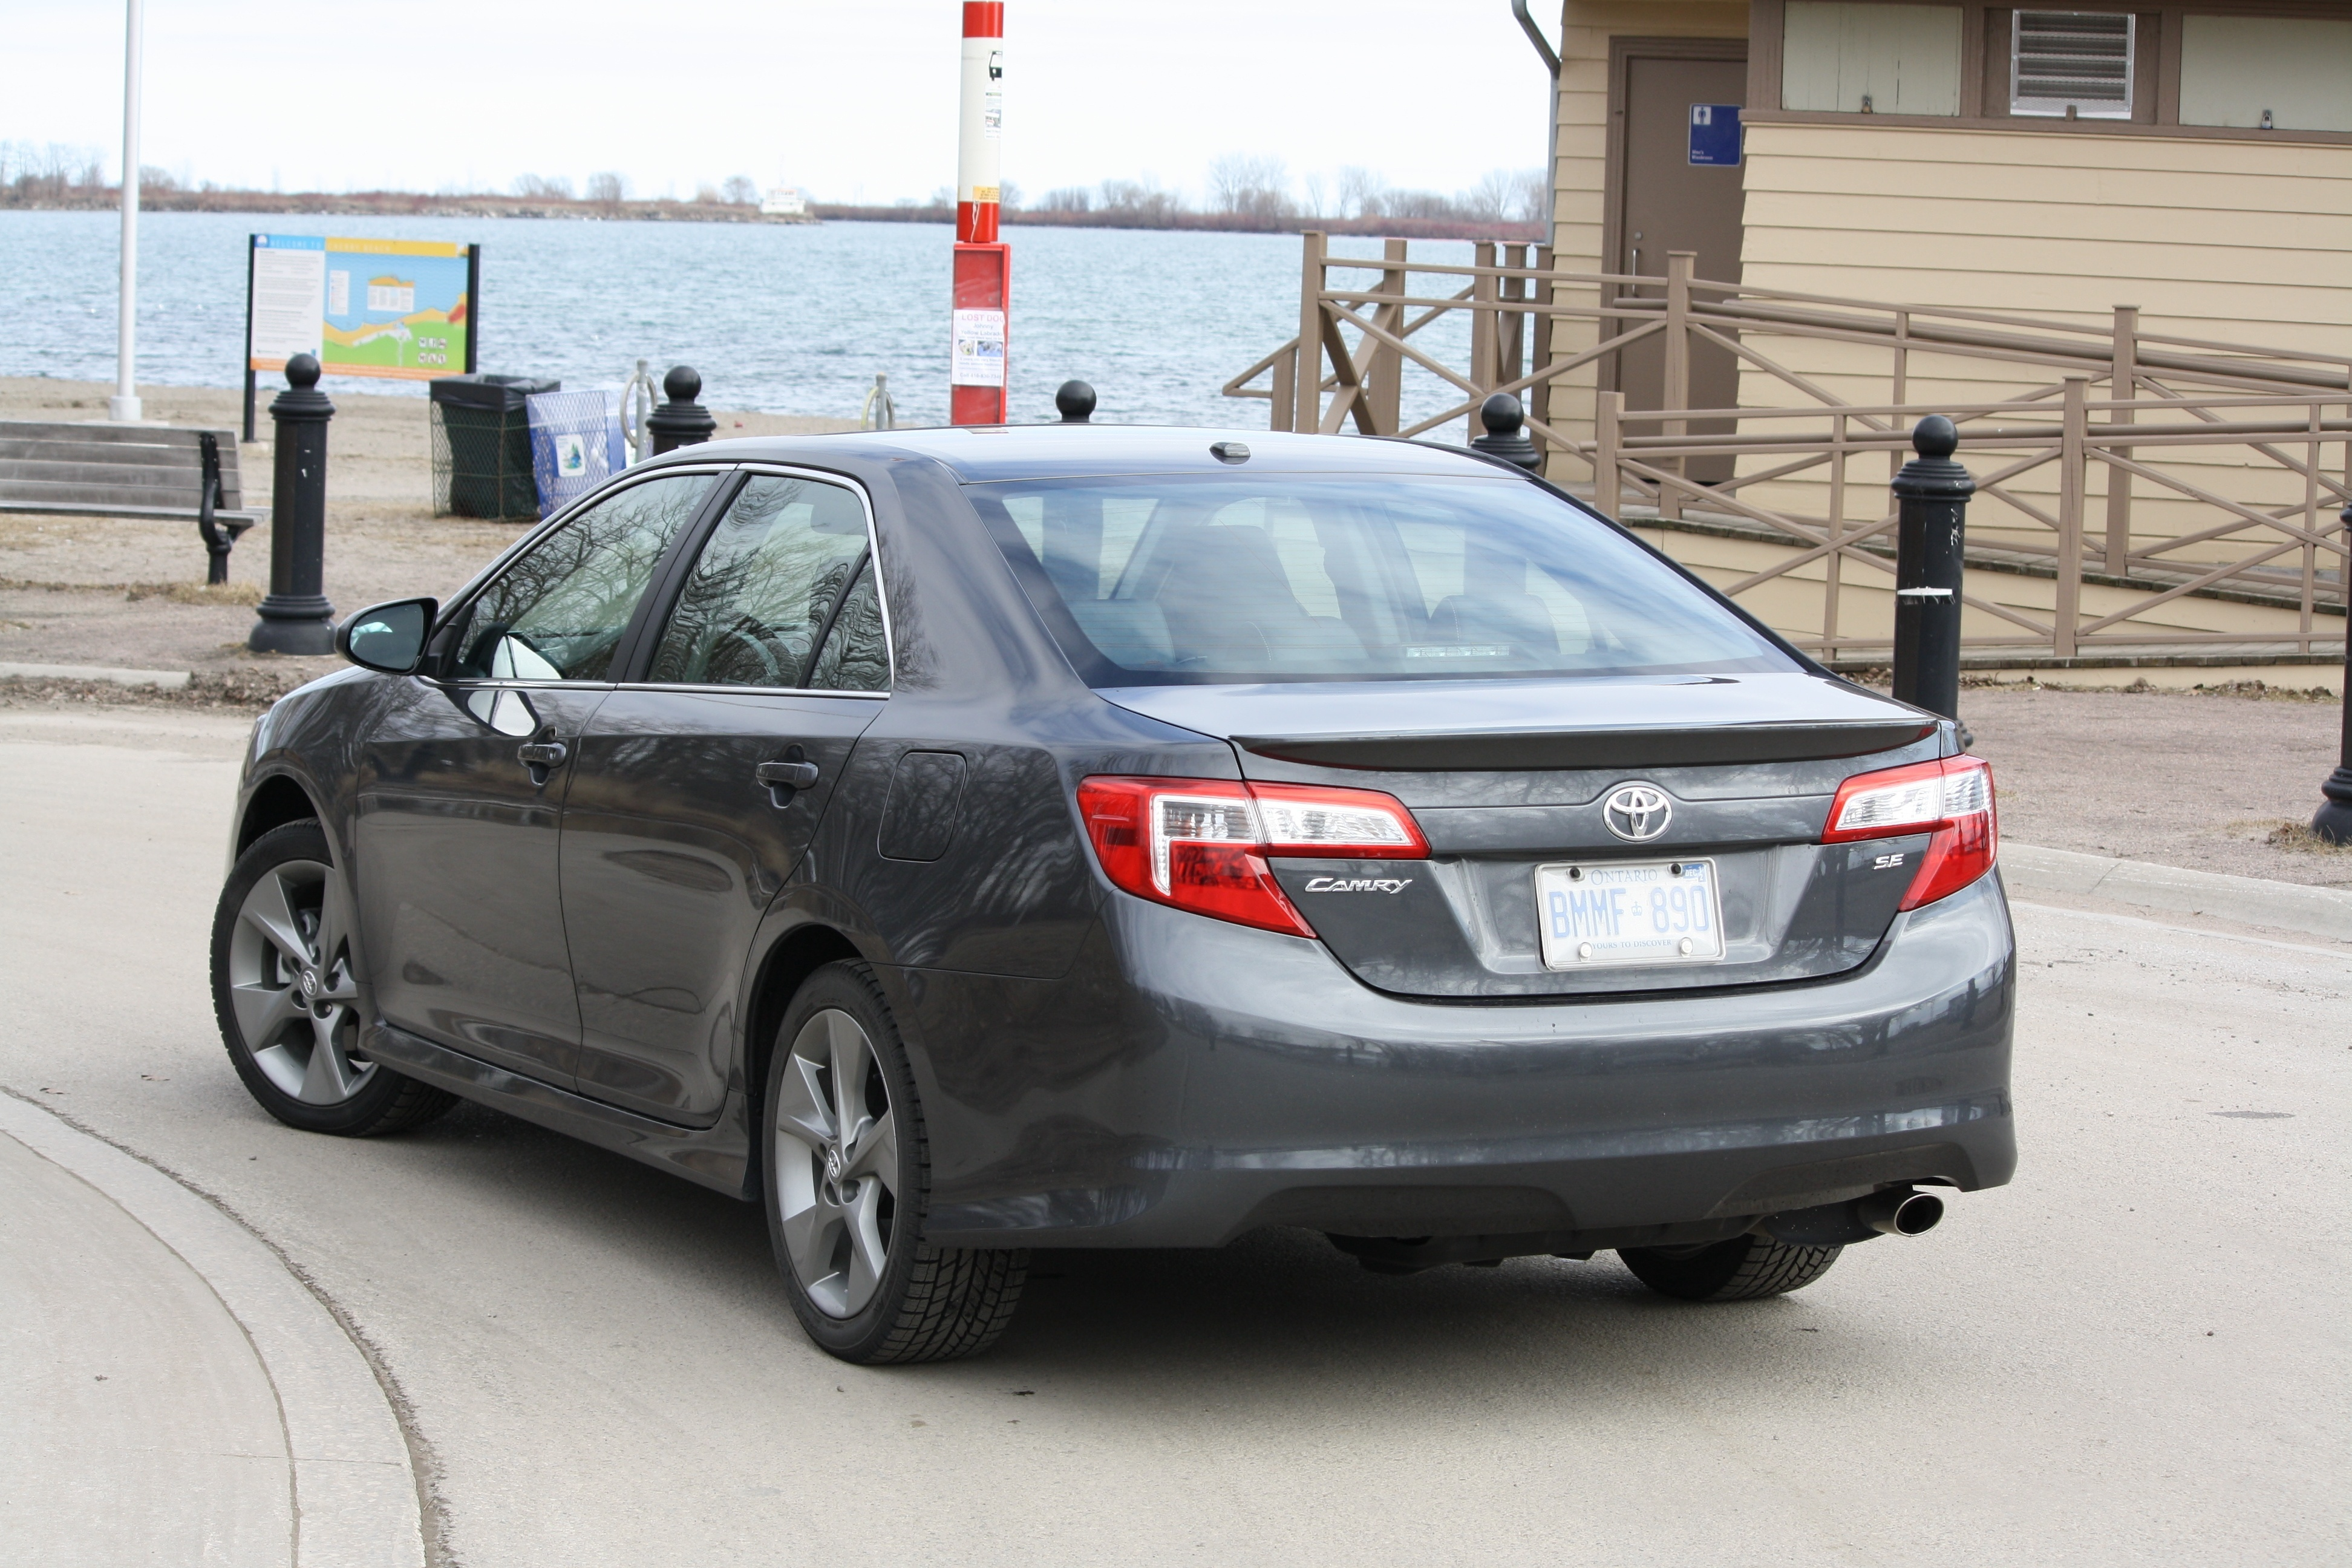

In [55]:
import glob
from IPython.display import Image, display

# Find the latest predict folder
predict_folders = sorted(glob.glob('/content/runs/detect/predict*'), key=os.path.getmtime)
latest_folder = predict_folders[-1]  # most recent

# Get the output image(s)
output_images = glob.glob(f"{latest_folder}/*.jpg")

# Show them
for img_path in output_images:
    display(Image(filename=img_path, width=600))


In [54]:
results = model.predict(image_path, save=True)



image 1/1 /content/runs/detect/predict4/06540.jpg: 448x640 (no detections), 195.3ms
Speed: 4.5ms preprocess, 195.3ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
